In [ ]:
!pip install pandas
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!wget --no-check-certificate \
  https://raw.githubusercontent.com/codernewbie04/CII3C3-TeamBased-Tugas3/main/seeds_dataset.csv?raw=true \
  -O /content/seeds_dataset.csv

--2022-12-19 03:18:41--  https://raw.githubusercontent.com/codernewbie04/CII3C3-TeamBased-Tugas3/main/seeds_dataset.csv?raw=true
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9368 (9.1K) [text/plain]
Saving to: ‘/content/seeds_dataset.csv’

/content/seeds_data 100%[===================>]   9.15K  --.-KB/s    in 0s      

2022-12-19 03:18:41 (58.2 MB/s) - ‘/content/seeds_dataset.csv’ saved [9368/9368]



In [ ]:
## Isi nama dan NIM seluruh anggota kelompok di sini
#   Nama    NIM
#   Akmal Muhamad Firdaus     1301204188
#   Muhammad Raffif Haziq     1301204146
#   Fadil Faithul Azhan       1301200213
#   Raihan Chaira             1301204324
#   
#   

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import VotingClassifier

# Load Dataset
Inisialisasi variable, masukan NIM di sini untuk random state.

Gunakan NIM salah satu anggota kelompok.



In [ ]:
filepath = "./seeds_dataset.csv"

# Isi nim anda di sini
nim = 1301204188 

Load dataset, cek konten data

Target kelas: **Category** 

In [ ]:
df = pd.read_csv(filepath, sep="\t")
df.sample(10, random_state=nim)

,Area,Perimeter,Compactness,Kernel_len,Kernel_width,Assymetry,Groove_len,Category
122,16.17,15.38,0.8588,5.762,3.387,4.286,5.703,2
50,14.43,14.40,0.8751,5.585,3.272,3.975,5.144,1
29,13.45,14.02,0.8604,5.516,3.065,3.531,5.097,1
128,20.16,17.03,0.8735,6.513,3.773,1.910,6.185,2
59,12.11,13.47,0.8392,5.159,3.032,1.502,4.519,1
185,11.56,13.31,0.8198,5.363,2.683,4.062,5.182,3
80,16.53,15.34,0.8823,5.875,3.467,5.532,5.880,2
85,18.27,16.09,0.8870,6.173,3.651,2.443,6.197,2
133,16.16,15.33,0.8644,5.845,3.395,4.266,5.795,2
155,11.19,13.05,0.8253,5.250,2.675,5.813,5.219,3


Training/test split **60/40**

In [ ]:
# X: semua kolom, Y: kolom terakhir (category)
x = df.iloc[:, 0:-1]
y = df.iloc[:, -1]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.60, random_state=nim)

# We perform bootstrap on the train data
# Keep test data for final accuracy testing
len(x_train), len(x_test)

(126, 84)

# Random Forest
Build a Random Forest, consisting of 20 Decision Tree classifer, with the following steps:

1. Prepare Bootstrap data (choose randomly from the *training data*, use sampling with replacement)
2. Choose 2-4 random features/atributes for each tree
3. Build Decision Tree classifier using step (1) and (2)
4. Calculate OOB score within the tree only

**NOTE**
This whole exercise has been simplified.
- Tree can be created using a library, therefore you may not be able control the feature selection on node level
- Random features are only selected in the beginning of each tree.
- OOB score is only calculated within its own tree instead.
- Typically Random Forest don't use train/test split and can be validated using OOB error. We simplify this to make it easier to test.
- You are not allowed to use a Random Forest or Bagging library.


In [ ]:
size = len(x_train.index.tolist())
rowsList= [i for i in range(size)]
columnList = x_train.columns.tolist()
import random

In [ ]:
np.random.seed(nim)
n_tree = 20
oob_scores = 0
forest = []
bootstrap_columns = []
for i in range(n_tree):
    # 1. Bootstrapping
    # select random rows
    rows = random.sample(rowsList, np.random.randint(80, 85))
    x_bootstrap = x_train.iloc[rows]
    y_bootstrap = y_train.iloc[rows]

    # Out of Bag data
    non_selected_rows = [i for i in rowsList if i not in rows]
    x_oob = x_train.iloc[non_selected_rows]
    y_oob = y_train.iloc[non_selected_rows]

    # 2. Select random features (make sure to keep track the selected columns)
    # Check for any repeated combinations
    feature_taken = np.random.randint(2, 4)
    cols = random.sample(columnList,feature_taken)
    print("Selected atribute:",cols)
    bootstrap_columns.append(cols)

    # filter based on the selected columns
    x_bootstrap = x_bootstrap[cols]

    # 3. Build decision tree
    # Let it grow, no pruning
    tree_model = tree.DecisionTreeClassifier(criterion="gini", max_depth=len(x_bootstrap.columns)+1)
    tree_model = tree_model.fit(x_bootstrap, y_bootstrap)

    # Add it to the forest
    forest.append(tree_model)
  
    # 4. Calculate oob score only within its own tree
    mis_label = 0
    pred = tree_model.predict(x_oob[cols])
    for j, k in enumerate(pred):
      if k != y_oob.iloc[j]:
          mis_label += 1
    oob_error = mis_label / len(x_oob)
    print("OOB_Error:",oob_error)
    print("OOB:",1-oob_error)
    print("nr oob", len(non_selected_rows))
    print("===============Separator============")
    print()
    
    



Selected atribute: ['Groove_len', 'Perimeter']
OOB_Error: 0.15217391304347827
OOB: 0.8478260869565217
nr oob 46
===============Separator============

Selected atribute: ['Perimeter', 'Groove_len', 'Compactness']
OOB_Error: 0.15217391304347827
OOB: 0.8478260869565217
nr oob 46
===============Separator============

Selected atribute: ['Assymetry', 'Groove_len']
OOB_Error: 0.1590909090909091
OOB: 0.8409090909090909
nr oob 44
===============Separator============

Selected atribute: ['Groove_len', 'Area', 'Compactness']
OOB_Error: 0.17777777777777778
OOB: 0.8222222222222222
nr oob 45
===============Separator============

Selected atribute: ['Kernel_len', 'Area']
OOB_Error: 0.15217391304347827
OOB: 0.8478260869565217
nr oob 46
===============Separator============

Selected atribute: ['Kernel_len', 'Area']
OOB_Error: 0.11363636363636363
OOB: 0.8863636363636364
nr oob 44
===============Separator============

Selected atribute: ['Area', 'Perimeter']
OOB_Error: 0.13953488372093023
OOB: 0.8604651

[Text(0.5769230769230769, 0.875, 'X[0] <= 15.09\ngini = 0.665\nsamples = 80\nvalue = [25, 26, 29]'),
 Text(0.3076923076923077, 0.625, 'X[0] <= 14.005\ngini = 0.514\nsamples = 54\nvalue = [24, 1, 29]'),
 Text(0.15384615384615385, 0.375, 'X[1] <= 3.752\ngini = 0.251\nsamples = 34\nvalue = [5, 0, 29]'),
 Text(0.07692307692307693, 0.125, 'gini = 0.5\nsamples = 10\nvalue = [5, 0, 5]'),
 Text(0.23076923076923078, 0.125, 'gini = 0.0\nsamples = 24\nvalue = [0, 0, 24]'),
 Text(0.46153846153846156, 0.375, 'X[1] <= 3.332\ngini = 0.095\nsamples = 20\nvalue = [19, 1, 0]'),
 Text(0.38461538461538464, 0.125, 'gini = 0.0\nsamples = 17\nvalue = [17, 0, 0]'),
 Text(0.5384615384615384, 0.125, 'gini = 0.444\nsamples = 3\nvalue = [2, 1, 0]'),
 Text(0.8461538461538461, 0.625, 'X[0] <= 15.47\ngini = 0.074\nsamples = 26\nvalue = [1, 25, 0]'),
 Text(0.7692307692307693, 0.375, 'X[1] <= 3.296\ngini = 0.5\nsamples = 2\nvalue = [1, 1, 0]'),
 Text(0.6923076923076923, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 

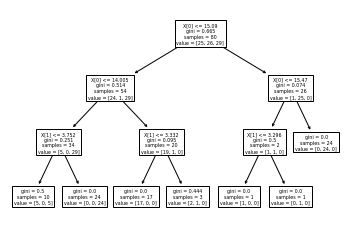

In [ ]:
tree.plot_tree(tree_model)

# Prediction and Voting
Run prediction on x_test data for each tree

Also calculate accuracy per tree here

In [ ]:
all_preds = []
all_acc = []
for i, tree_model in enumerate(forest):
    # Each tree has different column requirements
    # Make sure you use the correct columns for each tree
    x_test_filtered = x_test[bootstrap_columns[i]]

    predictions = tree_model.predict(x_test_filtered)

    # Might as well calculate accuracy per tree here...

    acc =  np.sum(predictions == y_test) / len(predictions)
    all_acc.append(acc)
    print(acc)
    # add it to all_preds for voting later
    all_preds.append(predictions)

all_preds = np.array(all_preds)


0.8928571428571429
0.8095238095238095
0.8333333333333334
0.8452380952380952
0.7976190476190477
0.8333333333333334
0.7976190476190477
0.7976190476190477
0.8928571428571429
0.8928571428571429
0.8452380952380952
0.8333333333333334
0.7738095238095238
0.7976190476190477
0.8452380952380952
0.7619047619047619
0.8333333333333334
0.8571428571428571
0.8690476190476191
0.8571428571428571


### Perform voting on the predictions from the Random Forest

In [ ]:
# Insert voting code here
category1 = 0
category2 = 0
category3 = 0
for i in range(len(all_preds)):
  for j in range(len(all_preds[i])):
        if all_preds[i][j] == 1 :
            category1 += 1
        elif all_preds[i][j] == 2 :
            category2 += 1
        else :
            category3 += 1
categories = [category1, category2, category3]
max_value = max(categories)
voted_predictions = categories.index(max_value) + 1

# Calculate accuracy of Test data on the Forest
acc = sum(all_acc) / len(all_acc)
acc



0.8333333333333334

After you're done with all this, please check the excel file and put the answers for every column there.